In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data

df = pd.read_csv('UCI_Credit_Card.csv')
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27560,27561,50000.0,1,3,2,57,-1,-1,-1,-1,...,390.0,390.0,390.0,1726.0,390.0,390.0,390.0,390.0,540.0,0
29378,29379,290000.0,1,1,2,28,0,0,0,2,...,9409.0,10153.0,9846.0,1200.0,1500.0,1000.0,900.0,0.0,800.0,1
14586,14587,320000.0,2,1,2,27,1,-1,2,2,...,0.0,0.0,0.0,638.0,0.0,0.0,0.0,0.0,0.0,1
29131,29132,260000.0,2,1,1,51,1,-1,-1,-1,...,218.0,0.0,0.0,2000.0,558.0,218.0,0.0,0.0,0.0,0
29209,29210,20000.0,1,2,2,23,0,-1,-1,-1,...,18628.0,19324.0,19208.0,6000.0,597.0,21722.0,1000.0,697.0,860.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


1) In EDUCATION column-need to merge labels(4,5,6).

2) MARRIAGE- label '0' anomaly

In [5]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.0,0.0,0.0,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.0,0.0,0.0,8.0


anomaly label -2 present

In [6]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


negative credit values present

In [7]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [8]:
df.loc[outliers_iqr(df["BILL_AMT3"])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29957,29958,500000.0,1,2,2,31,0,0,-1,0,...,278725.0,89161.0,87863.0,6025.0,294318.0,10254.0,7524.0,5009.0,2333.0,0
29963,29964,610000.0,1,1,2,31,0,-1,2,-1,...,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0
29978,29979,310000.0,1,2,1,39,0,0,0,0,...,219409.0,216540.0,210675.0,10029.0,9218.0,10029.0,8049.0,8040.0,10059.0,0
29988,29989,250000.0,1,1,1,34,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0


In [9]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [10]:
from collections import Counter

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
    

In [11]:
df.loc[detect_outliers(df,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,29480,140000.0,1,1,2,33,0,0,0,0,...,136481.0,135012.0,133324.0,7000.0,7000.0,7000.0,5500.0,6000.0,4624.0,0
29548,29549,220000.0,1,1,2,31,0,0,2,2,...,151588.0,147656.0,157276.0,12000.0,0.0,27500.0,0.0,12000.0,0.0,1
29801,29802,260000.0,1,1,2,33,2,2,2,2,...,142480.0,145630.0,150147.0,7000.0,0.0,18000.0,7000.0,7000.0,5500.0,0
29965,29966,140000.0,1,2,1,32,0,0,0,0,...,137450.0,135638.0,136375.0,6300.0,6500.0,6300.0,6000.0,5200.0,5000.0,0


In [12]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [13]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
#Default probability
df.def_pay.sum() / len(df.def_pay)

0.2212

In [15]:
df.SEX.value_counts() # SEX,MARRIAGE,EDUCATION

2    18112
1    11888
Name: SEX, dtype: int64

In [16]:
df[["SEX","def_pay"]].groupby(["SEX"], as_index = False).mean().sort_values(by="def_pay",ascending=False)

,SEX,def_pay
0,1,0.241672
1,2,0.207763


In [17]:
df[["MARRIAGE","def_pay"]].groupby(["MARRIAGE"], as_index = False).mean().sort_values(by="def_pay",ascending=False)

,MARRIAGE,def_pay
3,3,0.260062
1,1,0.234717
2,2,0.209283
0,0,0.092593


In [18]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

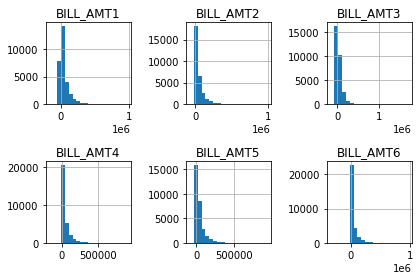

In [19]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

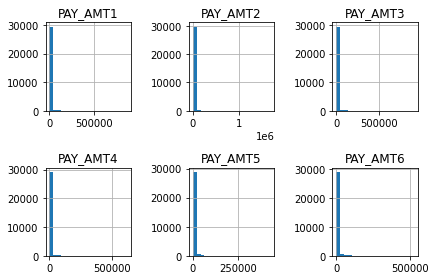

In [20]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

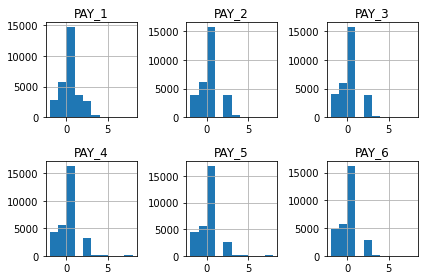

In [21]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


<AxesSubplot:>

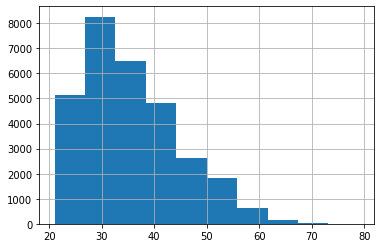

In [22]:
df.AGE.hist()

<AxesSubplot:>

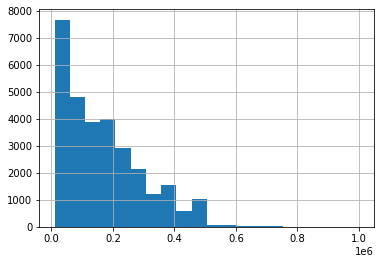

In [23]:
df.LIMIT_BAL.hist(bins = 20)

As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

One might wonder what these labels might mean.

"Other" in education can be an education lower than the high school level.
"Other" in marriage could be, for example, "divorced".
According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

In [24]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [25]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

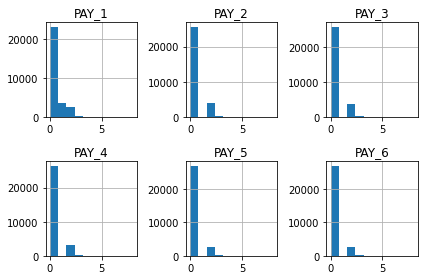

In [26]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [27]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [28]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'def_pay']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,def_pay
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


In [29]:
pd.crosstab(df.SEX, df.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [30]:
df[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


In [31]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [32]:
df.groupby(['SEX', 'def_pay']).size().unstack()

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [33]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


With increase in higher education, probability of defaulting the next month decreases

In [34]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Married, single and 'others' people are most likely to default

In [35]:
df['SE_MA'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA'] = 1 # Married male 
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA'] = 2 # Single male 
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA'] = 3 # divorced male
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA'] = 4 # married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA'] = 5 # single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA'] = 6 # divorced woman
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


I can see clearly that married men have a higher probability of defaulting, single men have nothing special with respect to the all population and single women have a lowe probability of defaulting. Among the divorced, men have more troubles (but these categories are not very much populated).

In [41]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['def_pay']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<ipython-input-41-a16f2e8f0e36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['def_pay']
c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [42]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0


<Figure size 720x360 with 0 Axes>

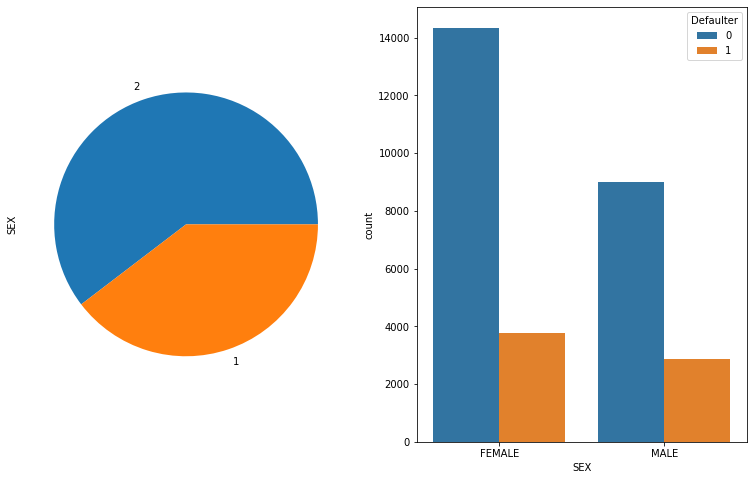

<Figure size 720x360 with 0 Axes>

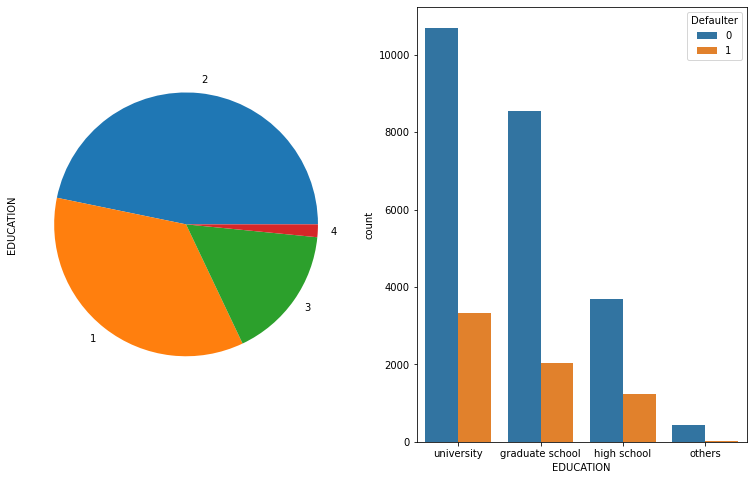

<Figure size 720x360 with 0 Axes>

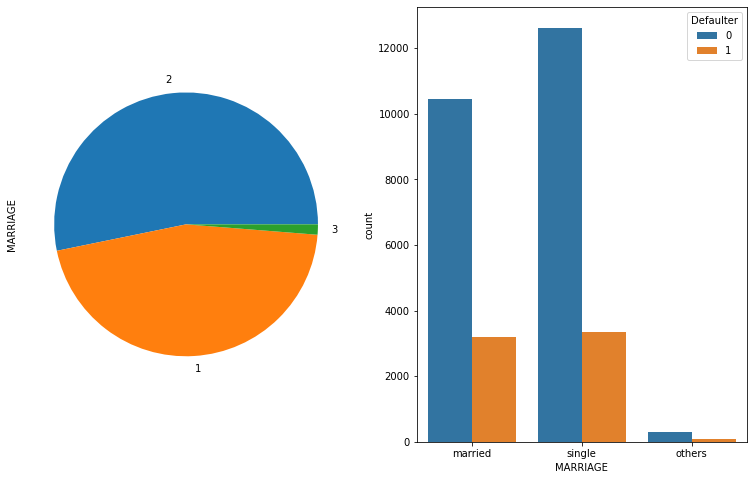

In [43]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

1) There are more females credit card holder,so no. of defaulter have high proportion of females.

2) No. of defaulters have a higher proportion of educated people (graduate school and university)

3) No. of defaulters have a higher proportion of Singles.

<AxesSubplot:>

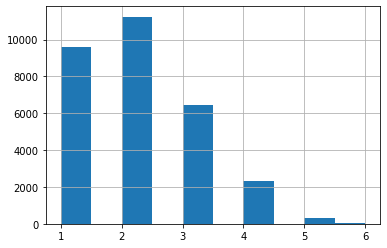

In [36]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

<AxesSubplot:>

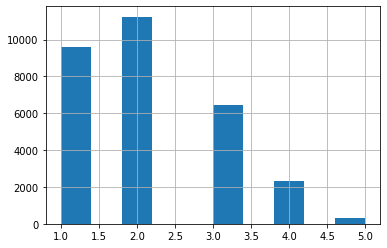

In [37]:
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [38]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,243,96,0.283186


I see that default probability goes down in your 30's and then goes higher and higher. 

In [39]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
1,2492,789,0.240475
2,3515,1050,0.230011
3,2080,691,0.249368
4,797,295,0.270147
5,131,48,0.268156
6,4929,1408,0.222187
7,5447,1226,0.183725
8,2899,794,0.215001
9,962,287,0.229784


how far the bill is from the limit should matter, thus I will create that variable. Since the result can vary a lot from one client to the other (the LIMIT_BAL variable has a very wide range), I will again weight this difference on the LIMIT_BAL feature (in my mind it has more meaning, maybe I am wrong). Again, I want to keep the historical trend of the variable

In [40]:
df['Proximity_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Proximity_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Proximity_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Proximity_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Proximity_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Proximity_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Proximity_6', 'Proximity_5', 'Proximity_4', 'Proximity_3', 'Proximity_2',
   'Proximity_1', 'def_pay']].sample(20)

,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
22924,0.942000,0.924000,0.982000,0.977000,0.918700,0.978750,0
13481,0.999972,0.999278,1.001972,0.998917,1.002417,1.001361,0
451,0.275475,0.265030,0.254783,0.217162,0.235230,0.221417,1
10181,0.438415,0.418408,0.410531,0.359654,0.269138,0.189185,0
28096,0.399760,0.420320,0.432860,0.417520,0.472700,0.458120,1
25384,0.818558,0.829483,0.843304,0.840596,0.858271,0.863042,1
2523,0.867514,0.877543,0.874843,0.862314,0.836371,0.855014,0
26327,0.323840,0.362280,0.345840,0.427460,0.444540,0.497540,1
1386,0.947450,0.954975,0.533294,0.810517,0.421375,0.008575,0
21655,1.000000,1.000000,1.000000,1.000000,1.000000,0.996558,0


In [41]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay',
       'SE_MA', 'AgeBin', 'SE_AG', 'Proximity_6', 'Proximity_5', 'Proximity_4',
       'Proximity_3', 'Proximity_2', 'Proximity_1'],
      dtype='object')

In [42]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,def_pay,SE_MA,AgeBin,SE_AG,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1
0,1,20000.0,2,2,1,24,2,2,0,0,...,1,4,1,6,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,2,120000.0,2,2,2,26,0,2,0,0,...,1,5,1,6,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,3,90000.0,2,2,2,34,0,0,0,0,...,0,5,2,7,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,4,50000.0,2,2,1,37,0,0,0,0,...,0,4,2,7,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,5,50000.0,1,2,1,57,0,0,0,0,...,0,1,4,4,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


In [43]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'SE_AG', 'Proximity_6', 'Proximity_5',
       'Proximity_4', 'Proximity_3', 'Proximity_2', 'Proximity_1']
y = df['def_pay']
X = df[features]

In [44]:
X.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,SE_MA,AgeBin,SE_AG,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1
0,20000.0,2,1,2,2,0,0,0,0,3913.0,...,0.0,4,1,6,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,120000.0,2,2,0,2,0,0,0,2,2682.0,...,2000.0,5,1,6,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,90000.0,2,2,0,0,0,0,0,0,29239.0,...,5000.0,5,2,7,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,50000.0,2,1,0,0,0,0,0,0,46990.0,...,1000.0,4,2,7,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,50000.0,2,1,0,0,0,0,0,0,8617.0,...,679.0,1,4,4,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [59]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,24000.0,167364.666667,129511.313151,10000.000000,50000.000000,140000.000000,240000.000000,1.000000e+06
EDUCATION,24000.0,1.842500,0.744625,1.000000,1.000000,2.000000,2.000000,4.000000e+00
MARRIAGE,24000.0,1.558750,0.521274,1.000000,1.000000,2.000000,2.000000,3.000000e+00
PAY_1,24000.0,0.357667,0.760766,0.000000,0.000000,0.000000,0.000000,8.000000e+00
PAY_2,24000.0,0.320292,0.803523,0.000000,0.000000,0.000000,0.000000,8.000000e+00
PAY_3,24000.0,0.302792,0.787380,0.000000,0.000000,0.000000,0.000000,8.000000e+00
PAY_4,24000.0,0.257208,0.751383,0.000000,0.000000,0.000000,0.000000,8.000000e+00
PAY_5,24000.0,0.218625,0.705289,0.000000,0.000000,0.000000,0.000000,8.000000e+00
PAY_6,24000.0,0.225833,0.706708,0.000000,0.000000,0.000000,0.000000,8.000000e+00
BILL_AMT1,24000.0,51100.502250,73510.032060,-165580.000000,3513.750000,22330.000000,66966.500000,9.645110e+05


In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
LR = LogisticRegression(random_state=0,solver="liblinear")
LR.fit(X_train_std, y_train)
y_pred = LR.predict(X_test_std)
print('Accuracy:', accuracy_score(y_pred,y_test))
print('confusion matrix-test\n',confusion_matrix(y_pred,y_test))
cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.8155
confusion matrix-test
 [[4460  894]
 [ 213  433]]

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.67      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0002


1) I will upsample the minority class
2) downsample the majority class
3) create a synthetic sample using smote

In [62]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,SE_MA,AgeBin,SE_AG,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
6383,90000.0,2,2,0,0,0,0,0,0,86294.0,...,2,1,1,0.369167,0.216256,0.229311,0.001633,0.017644,0.041178,0
11929,20000.0,2,1,0,0,0,2,2,0,9622.0,...,1,2,2,0.233000,0.262950,0.243850,0.251850,0.451300,0.518900,0
1592,180000.0,2,1,0,0,0,0,0,0,70721.0,...,1,3,3,0.592394,0.592800,0.609789,0.609978,0.611144,0.607106,0
29533,50000.0,1,2,1,2,0,0,0,0,49395.0,...,2,2,2,1.000000,1.000000,1.000000,-0.015060,-0.001160,0.012100,0
17724,30000.0,3,1,2,2,2,2,0,0,29468.0,...,4,4,9,0.648700,0.553567,0.066667,0.036033,0.010400,0.017733,1
820,200000.0,3,3,0,0,0,0,0,0,780.0,...,6,4,9,0.998050,0.998050,0.996100,0.998050,1.000000,0.996100,0
29154,140000.0,1,1,3,2,2,3,3,3,450.0,...,4,4,9,0.991786,0.989643,0.996786,0.996786,0.996786,0.996786,1
7465,200000.0,2,2,0,0,0,0,0,0,190120.0,...,2,2,2,0.064590,0.064750,0.052715,0.029125,0.027335,0.049400,1
5229,260000.0,1,2,0,0,0,0,0,0,15178.0,...,5,1,6,0.914331,0.924377,0.926981,0.915004,0.910154,0.941623,0
23961,50000.0,2,2,0,0,0,0,0,0,46980.0,...,2,1,1,0.423380,0.432800,0.406760,0.019200,0.043820,0.060400,1


In [63]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_train[df_train.def_pay==0]
df_minority = df_train[df_train.def_pay==1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

18691
-----------
5309
-----------
0    18691
1     5309
Name: def_pay, dtype: int64


In [64]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18691,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

0    18691
1    18691
Name: def_pay, dtype: int64

In [65]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5309,     # to match minority class
                                 random_state=24) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

0    5309
1    5309
Name: def_pay, dtype: int64

The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling.

The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time

To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

37382
18691
0    18691
1    18691
Name: def_pay, dtype: int64


So now we have 4 training sets:

1) X_train, y_train, with their unbalance and their authenticity

2) df_upsample, which is balanced but at overfitting risk

3) df_downsample, which will be fast but also potentially useless in terms of predictability (the test set is even bigger than it)

4) X_SMOTE, y_SMOTE, which is syntetic and I don't really know it but should avoid overfitting

5) I will do everything 4 times so that I can see the results. Now, in my mind the process goes like that:

6) K-fold evaluation, run on different models should give us an idea on which one is more stable towards splitting of train and test

7) Hyperparameter selection, so that we can have the best version of every algorithm

8) Training
9) Testing

10) In these steps one pitfall we encountered already is how to evaluate. We have already seen that using accuracy is not very convenient, while using (for example) the f1 metric is.

11) Another step would be probability calibration, which is a topic I am not particulartly familiar with (ok, another topic I am not particularly familiar with, smarty pants) and I will ignore for now but I will maybe elaborate in a future version of this notebook.

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [208]:
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

Wall time: 9min 18s
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=600, n_jobs=-1)
0.4681393459338107


In [68]:
from sklearn import metrics

In [76]:
forest_normal = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
forest_normal.fit(X_train, y_train)
y_pred_fn = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_fn),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_fn),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_fn == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_fn == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_fn == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_fn == 0, y_test == 1))
pred = len(y_pred_fn)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.453
Accuracy: 0.811
-------------
True Positives: 470
False Positive: 279
True Negative: 4394
False Negative: 857
Precision: 0.63
Recall: 0.35


In [77]:
y_upsampled = df_upsampled.def_pay
X_upsampled = df_upsampled.drop(['def_pay'], axis= 1)

In [219]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_upsampled = grid_forest.best_estimator_

Wall time: 15min 47s
RandomForestClassifier(n_estimators=1000, n_jobs=-1)
0.9377530991880461


In [80]:
forest_upsampled = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
forest_upsampled.fit(X_upsampled, y_upsampled)
y_pred_fu = forest_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_fu),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_fu),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_fu == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_fu == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_fu == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_fu == 0, y_test == 1))
pred = len(y_pred_fu)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.486
Accuracy: 0.805
-------------
True Positives: 554
False Positive: 399
True Negative: 4274
False Negative: 773
Precision: 0.58
Recall: 0.42


In [83]:
y_downsampled = df_downsampled.def_pay
X_downsampled = df_downsampled.drop(['def_pay'], axis = 1)

In [225]:
# downsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini']}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_forest = grid_forest.fit(X_downsampled, y_downsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_downsampled = grid_forest.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 4min 19s
RandomForestClassifier(n_estimators=400)
0.6934982129068884


In [91]:
forest_downsampled = RandomForestClassifier(criterion='gini', n_estimators=400, n_jobs=-1)
forest_downsampled.fit(X_downsampled, y_downsampled)
y_pred_fd = forest_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_fd),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_fd),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_fd == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_fd == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_fd == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_fd == 0, y_test == 1))
pred = len(y_pred_fd)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.518
Accuracy: 0.738
-------------
True Positives: 846
False Positive: 1094
True Negative: 3579
False Negative: 481
Precision: 0.44
Recall: 0.64


In [231]:
# SMOTE training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini']}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_SMOTE = grid_forest.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 16min 31s
RandomForestClassifier(n_estimators=600)
0.8460998863646463


In [232]:
print(grid_forest.best_estimator_)

RandomForestClassifier(n_estimators=600)


In [94]:
forest_SMOTE = RandomForestClassifier(criterion='gini', n_estimators=600, n_jobs=-1)
forest_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_fS = forest_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_fS),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_fS),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_fS == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_fS == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_fS == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_fS == 0, y_test == 1))
pred = len(y_pred_fS)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.498
Accuracy: 0.784
-------------
True Positives: 641
False Positive: 608
True Negative: 4065
False Negative: 686
Precision: 0.51
Recall: 0.48


In [236]:
## Adaboost

# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), 
                        param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_normal = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 53min 17s
AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.75, n_estimators=200)
0.4325853647205865


In [97]:
ada_normal = AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(),
          learning_rate=0.75, n_estimators=200, random_state=None)
ada_normal.fit(X_train, y_train)
y_pred_an = ada_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_an),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_an),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_an == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_an == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_an == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_an == 0, y_test == 1))
pred = len(y_pred_an)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.421
Accuracy: 0.767
-------------
True Positives: 507
False Positive: 577
True Negative: 4096
False Negative: 820
Precision: 0.47
Recall: 0.38


In [244]:
# upsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_upsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 6min 11s
AdaBoostClassifier(n_estimators=300)
0.6981018475265925


In [99]:
ada_upsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)
ada_upsampled.fit(X_upsampled, y_upsampled)
y_pred_au = ada_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_au),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_au),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_au == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_au == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_au == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_au == 0, y_test == 1))
pred = len(y_pred_au)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.509
Accuracy: 0.75
-------------
True Positives: 778
False Positive: 952
True Negative: 3721
False Negative: 549
Precision: 0.45
Recall: 0.59


In [246]:
# downsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_downsampled, y_downsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_downsampled = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 1min 54s
AdaBoostClassifier(learning_rate=0.75, n_estimators=200)
0.6816569768611409


In [100]:
ada_downsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)
ada_downsampled.fit(X_downsampled, y_downsampled)
y_pred_ad = ada_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_ad),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_ad),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_ad == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_ad == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_ad == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_ad == 0, y_test == 1))
pred = len(y_pred_ad)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.506
Accuracy: 0.736
-------------
True Positives: 811
False Positive: 1068
True Negative: 3605
False Negative: 516
Precision: 0.43
Recall: 0.61


In [248]:
# SMOTE training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_SMOTE = grid_ada.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 7min 3s
AdaBoostClassifier(n_estimators=300)
0.7541699490957388


In [101]:
ada_SMOTE = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.5,
          n_estimators=300, random_state=None)
ada_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_as = ada_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_as),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_as),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_as == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_as == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_as == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_as == 0, y_test == 1))
pred = len(y_pred_as)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.501
Accuracy: 0.752
-------------
True Positives: 745
False Positive: 905
True Negative: 3768
False Negative: 582
Precision: 0.45
Recall: 0.56


In [254]:
## Gradient Boosting

# normal training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_train, y_train)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_normal = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 4min 56s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
0.4568977191875371


In [102]:
gbc_normal = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
GradientBoostingClassifier
gbc_normal.fit(X_train, y_train)
y_pred_gn = gbc_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_gn),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_gn),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_gn == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_gn == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_gn == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_gn == 0, y_test == 1))
pred = len(y_pred_gn)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.454
Accuracy: 0.803
-------------
True Positives: 492
False Positive: 347
True Negative: 4326
False Negative: 835
Precision: 0.59
Recall: 0.37


In [256]:
#upsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_upsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 8min 49s
GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)
0.8341613899007729


In [103]:
gbc_upsampled = GradientBoostingClassifier(learning_rate=1.0, n_estimators=300)
gbc_upsampled.fit(X_upsampled, y_upsampled)
y_pred_gu = gbc_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_gu),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_gu),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_gu == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_gu == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_gu == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_gu == 0, y_test == 1))
pred = len(y_pred_gu)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.48
Accuracy: 0.739
-------------
True Positives: 725
False Positive: 966
True Negative: 3707
False Negative: 602
Precision: 0.43
Recall: 0.55


In [258]:
#downsampled training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_downsampled = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 2min 17s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
0.687452660211962


In [105]:
gbc_downsampled = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
gbc_downsampled.fit(X_downsampled, y_downsampled)
y_pred_gd = gbc_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_gd),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_gd),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_gd == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_gd == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_gd == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_gd == 0, y_test == 1))
pred = len(y_pred_gd)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.482
Accuracy: 0.694
-------------
True Positives: 855
False Positive: 1363
True Negative: 3310
False Negative: 472
Precision: 0.39
Recall: 0.64


In [260]:
#SMOTE training set
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE = grid_gbc.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 9min 20s
GradientBoostingClassifier(learning_rate=0.5, n_estimators=300)
0.7804807260204091


In [106]:
gbc_SMOTE = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200)
gbc_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred_gs = gbc_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_gs),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_gs),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_gs == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_gs == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_gs == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_gs == 0, y_test == 1))
pred = len(y_pred_gs)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

-------------
f1 score: 0.483
Accuracy: 0.772
-------------
True Positives: 637
False Positive: 675
True Negative: 3998
False Negative: 690
Precision: 0.49
Recall: 0.48


In [120]:
def hyperParameterTuning(X_downsampled, y_downsampled):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7,1],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
    }

    xgb_model = XGBClassifier()
    acc_scorer = make_scorer(f1_score)

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = acc_scorer,  
                           cv = 5,
                           verbose = 2,
                           n_jobs = -1
                          )

    gsearch.fit(X_downsampled,y_downsampled)

    return gsearch.best_params_

In [111]:
param_grid = {
        'learning_rate': [0.01, 0.1,0.3],
        'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7,1],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
    }
acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(XGBClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
%time grid_gbc = grid_gbc.fit(X_downsampled, y_downsampled)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 46min 40s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)
0.697703290943735


In [264]:
%time hyperParameterTuning(X_downsampled, y_downsampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 44min 44s


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.7}

In [117]:
xgb_downsampled = XGBClassifier(
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 7,
        n_estimators = 500,
        subsample = 0.7)

In [118]:
xgb_downsampled.fit(X_downsampled, y_downsampled)
y_pred_xd = xgb_downsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_xd),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_xd),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_xd == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_xd == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_xd == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_xd == 0, y_test == 1))
pred = len(y_pred_xd)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------
f1 score: 0.528
Accuracy: 0.746
-------------
True Positives: 854
False Positive: 1054
True Negative: 3619
False Negative: 473
Precision: 0.45
Recall: 0.64


In [119]:
%time hyperParameterTuning(X_train, y_train)

NameError: name 'hyperParameterTuning' is not defined

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.7}

In [126]:
xgb_normal = XGBClassifier(
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 3,
        n_estimators = 100,
        subsample = 0.7)
xgb_normal.fit(X_train, y_train)
y_pred_xn = xgb_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_xn),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_xn),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_xn == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_xn == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_xn == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_xn == 0, y_test == 1))
pred = len(y_pred_xn)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------
f1 score: 0.468
Accuracy: 0.818
-------------
True Positives: 481
False Positive: 248
True Negative: 4425
False Negative: 846
Precision: 0.66
Recall: 0.36


In [123]:
%time hyperParameterTuning(X_upsampled, y_upsampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2h 24min 46s


{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 1}

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 1}

In [124]:
# #upsampled training set
# param_grid = {
#         'learning_rate': [0.01, 0.1,0.3],
#         'max_depth': [3, 5, 7, 10],
#         #'min_child_weight': [1, 3, 5],
#         'subsample': [0.5, 0.7,1],
#         'colsample_bytree': [0.5, 0.7],
#         'n_estimators' : [100, 200, 500],
#     }
# acc_scorer = make_scorer(f1_score)
# grid_gbc = GridSearchCV(XGBClassifier(), param_grid, scoring = acc_scorer, cv=5,verbose = 1,n_jobs = -1)
# %time grid_gbc = grid_gbc.fit(X_upsampled, y_upsampled)
# print(grid_gbc.best_estimator_)
# print(grid_gbc.best_score_)
# gbc_upsampled = grid_gbc.best_estimator_

In [127]:
xgb_upsampled = XGBClassifier(
        colsample_bytree = 0.5,
        learning_rate = 0.3,
        max_depth = 10,
        n_estimators = 500,
        subsample = 1)
xgb_upsampled.fit(X_upsampled, y_upsampled)
y_pred_xu = xgb_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_xu),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_xu),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_xu == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_xu == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_xu == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_xu == 0, y_test == 1))
pred = len(y_pred_xu)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------
f1 score: 0.451
Accuracy: 0.788
-------------
True Positives: 522
False Positive: 465
True Negative: 4208
False Negative: 805
Precision: 0.53
Recall: 0.39


In [128]:
%time hyperParameterTuning(X_SMOTE, y_SMOTE)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3h 7min 25s


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.5}

Wall time: 3h 7min 25s
{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.5}

In [133]:
xgb_SMOTE = XGBClassifier(
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 10,
        n_estimators = 500,
        subsample = 0.5)
xgb_SMOTE.fit(X_train, y_train)
y_pred_xs = xgb_SMOTE.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred_xs),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred_xs),3)))
print("-------------")
TP = np.sum(np.logical_and(y_pred_xs == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_xs == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_xs == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_xs == 0, y_test == 1))
pred = len(y_pred_xs)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------
f1 score: 0.454
Accuracy: 0.806
-------------
True Positives: 485
False Positive: 325
True Negative: 4348
False Negative: 842
Precision: 0.6
Recall: 0.37


In [130]:
list(X_downsampled.columns.values.tolist()) 

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SE_MA',
 'AgeBin',
 'SE_AG',
 'Proximity_6',
 'Proximity_5',
 'Proximity_4',
 'Proximity_3',
 'Proximity_2',
 'Proximity_1']

In [134]:
importances = forest_downsampled.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_downsampled.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_downsampled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.085905)
2. feature 0 (0.047273)
3. feature 29 (0.046758)
4. feature 9 (0.044748)
5. feature 15 (0.043136)
6. feature 28 (0.041467)
7. feature 27 (0.039915)
8. feature 16 (0.039506)
9. feature 24 (0.038499)
10. feature 26 (0.038269)
11. feature 17 (0.037923)
12. feature 10 (0.037394)
13. feature 20 (0.036433)
14. feature 25 (0.035760)
15. feature 11 (0.035352)
16. feature 4 (0.034368)
17. feature 12 (0.034360)
18. feature 14 (0.034356)
19. feature 13 (0.034155)
20. feature 18 (0.033643)
21. feature 19 (0.033114)
22. feature 5 (0.023588)
23. feature 23 (0.022330)
24. feature 6 (0.019561)
25. feature 22 (0.016647)
26. feature 1 (0.016241)
27. feature 21 (0.015194)
28. feature 7 (0.015038)
29. feature 8 (0.010933)
30. feature 2 (0.008134)


In [139]:
feature_important = xgb_SMOTE.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

In [148]:
feature_important

{'LIMIT_BAL': 3750.0,
 'EDUCATION': 1429.0,
 'MARRIAGE': 784.0,
 'PAY_1': 1168.0,
 'PAY_2': 293.0,
 'PAY_3': 333.0,
 'PAY_4': 324.0,
 'PAY_5': 234.0,
 'PAY_6': 244.0,
 'BILL_AMT1': 4368.0,
 'BILL_AMT2': 3329.0,
 'BILL_AMT3': 3133.0,
 'BILL_AMT4': 3079.0,
 'BILL_AMT5': 2997.0,
 'BILL_AMT6': 3214.0,
 'PAY_AMT1': 4047.0,
 'PAY_AMT2': 3656.0,
 'PAY_AMT3': 3795.0,
 'PAY_AMT4': 3732.0,
 'PAY_AMT5': 3688.0,
 'PAY_AMT6': 4078.0,
 'SE_MA': 1427.0,
 'AgeBin': 1546.0,
 'SE_AG': 2114.0,
 'Proximity_6': 3899.0,
 'Proximity_5': 3416.0,
 'Proximity_4': 3494.0,
 'Proximity_3': 3662.0,
 'Proximity_2': 3873.0,
 'Proximity_1': 4546.0}

In [140]:
data

,score
Proximity_1,4546.0
BILL_AMT1,4368.0
PAY_AMT6,4078.0
PAY_AMT1,4047.0
Proximity_6,3899.0
Proximity_2,3873.0
PAY_AMT3,3795.0
LIMIT_BAL,3750.0
PAY_AMT4,3732.0
PAY_AMT5,3688.0


<AxesSubplot:>

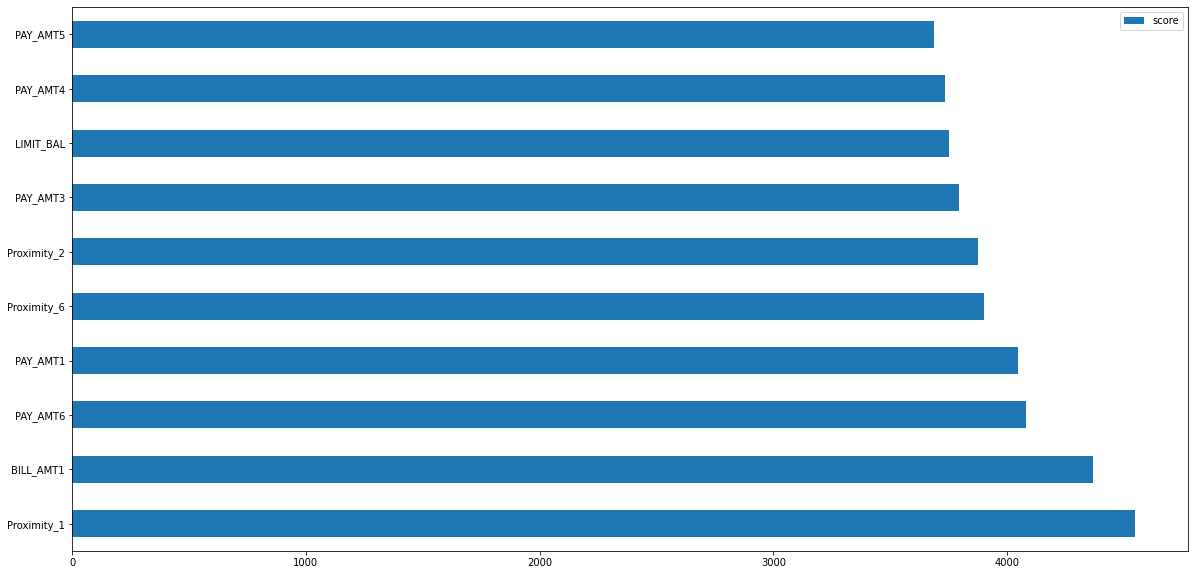

In [141]:
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features

In [147]:
sorted_idx = np.argsort(xgb_SMOTE.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_SMOTE.columns[index], xgb_SMOTE.feature_importances_[index]])


['PAY_1', 0.14042224]
['PAY_2', 0.11181332]
['PAY_5', 0.039175533]
['PAY_3', 0.03834991]
['PAY_4', 0.037718967]
['PAY_6', 0.03401605]
['BILL_AMT1', 0.027285557]
['Proximity_2', 0.027104167]
['Proximity_4', 0.027045963]
['PAY_AMT4', 0.026690785]
['Proximity_1', 0.026687264]
['PAY_AMT2', 0.026520923]
['Proximity_3', 0.02642939]
['BILL_AMT3', 0.026363088]
['BILL_AMT6', 0.026200525]
['BILL_AMT4', 0.026066395]
['Proximity_5', 0.026062176]
['BILL_AMT5', 0.026024267]
['Proximity_6', 0.025941905]
['PAY_AMT3', 0.025805632]
['PAY_AMT1', 0.025547236]
['BILL_AMT2', 0.025084127]
['PAY_AMT6', 0.025028503]
['PAY_AMT5', 0.024530614]
['EDUCATION', 0.022218263]
['LIMIT_BAL', 0.022161668]
['AgeBin', 0.021101817]
['SE_MA', 0.020911131]
['SE_AG', 0.020897992]
['MARRIAGE', 0.020794543]


In [151]:
xgb_SMOTE.feature_importances_

array([0.02216167, 0.02221826, 0.02079454, 0.14042224, 0.11181332,
       0.03834991, 0.03771897, 0.03917553, 0.03401605, 0.02728556,
       0.02508413, 0.02636309, 0.02606639, 0.02602427, 0.02620053,
       0.02554724, 0.02652092, 0.02580563, 0.02669078, 0.02453061,
       0.0250285 , 0.02091113, 0.02110182, 0.02089799, 0.0259419 ,
       0.02606218, 0.02704596, 0.02642939, 0.02710417, 0.02668726],
      dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

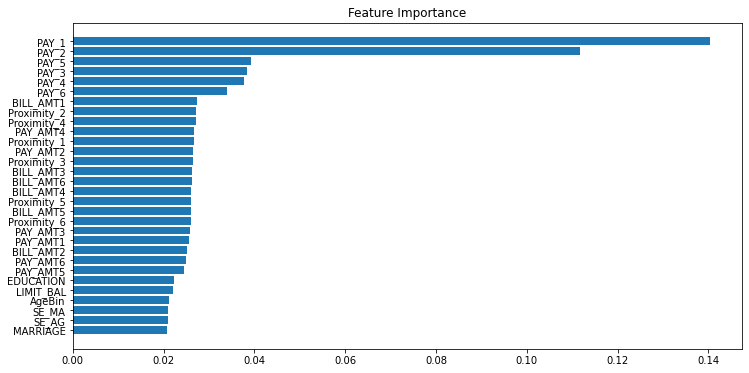

In [152]:
feature_importance = xgb_SMOTE.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
